<a href="https://colab.research.google.com/github/Sank-Infinity/Artificial-Neural-Network-banknote-authentication/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering on dataset

In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load dataset
dataset = pd.read_csv('/content/train.csv')   

In [0]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


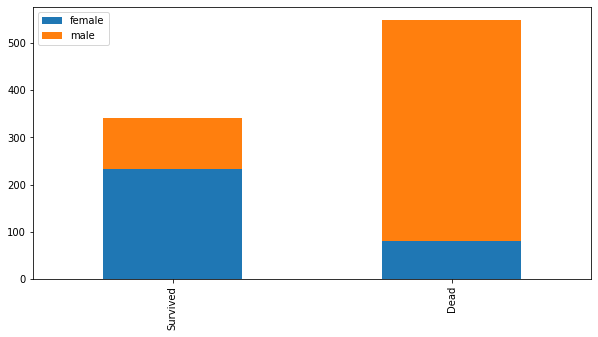

In [0]:
## Let's do analysis feature by feature
def bar_chart(feature):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
bar_chart('Sex')

From above bar graph we can interpret that here that blue band represents female and orange band represents male. In the survived column, females are survived than males.

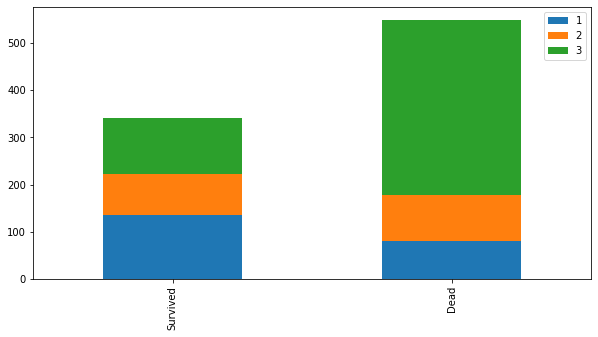

In [0]:
bar_chart('Pclass')

In Pclass feature, It looks quit fair with 1 and 2 class but big part of 3rd class has died .

In [0]:
dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

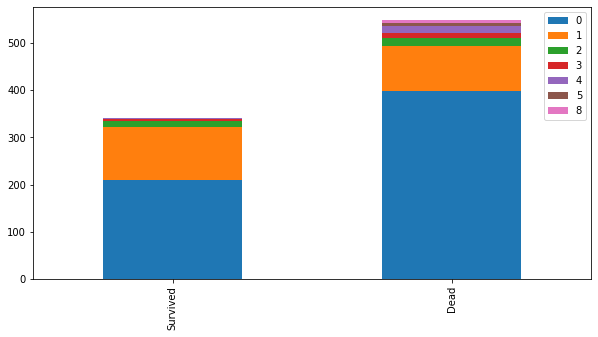

In [0]:
bar_chart('SibSp')

In [0]:
dataset['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

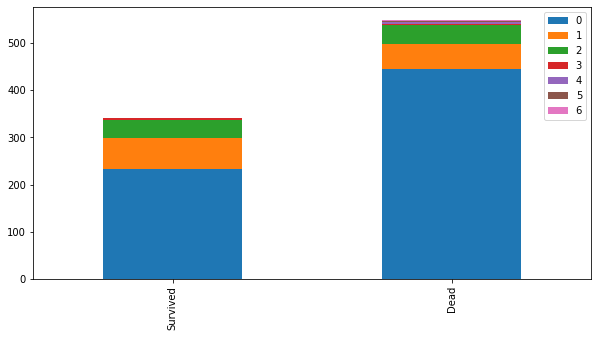

In [0]:
bar_chart('Parch')

In [0]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

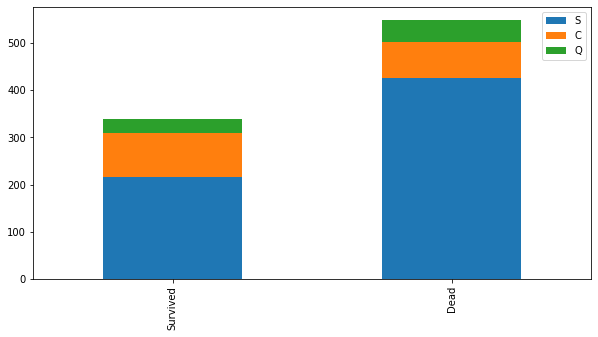

In [0]:
bar_chart('Embarked')

In [0]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin has a lot of missing values so, it's better to drop it. In case of age, age is making impact on results that's why we need to handle its missing values.



In [0]:
## Let's divide features and target 
feature_of_matrix = ['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = dataset[feature_of_matrix]
y = dataset['Survived']

In [0]:
# view of splited dataset
X.head(), y.head()

(   Pclass   Age     Sex  SibSp  Parch     Fare Embarked
 0       3  22.0    male      1      0   7.2500        S
 1       1  38.0  female      1      0  71.2833        C
 2       3  26.0  female      0      0   7.9250        S
 3       1  35.0  female      1      0  53.1000        S
 4       3  35.0    male      0      0   8.0500        S, 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

# Handling missing values

In [0]:
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].value_counts().index[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
X.isnull().sum()

Pclass      0
Age         0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [0]:
## Now we need to handle categorical variables 
# Sex
df = pd.get_dummies(X['Sex'])
X = pd.concat([X,df], axis=1)
X = X.drop(['Sex'], axis=1)

In [0]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,3,22.0,1,0,7.2500,S,0,1
1,1,38.0,1,0,71.2833,C,1,0
2,3,26.0,0,0,7.9250,S,1,0
3,1,35.0,1,0,53.1000,S,1,0
4,3,35.0,0,0,8.0500,S,0,1


In [0]:
# lets create dummies for embarked  
df = pd.get_dummies(X['Embarked'])
X = pd.concat([X,df], axis=1)
# here we are dropping 'C' also because avoiding dummy variable trap
X = X.drop(['Embarked','C'], axis=1)

In [0]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1


# It looks good now we can apply machine learning algorithm

In [0]:
## First of all we need to split data into training and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

In [0]:
## lets fit out model 

from xgboost import XGBClassifier
classifier = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 10,
                    nthread= 4,
                    random_state= 2,
                    silent= True)

classifier.fit(X_train, y_train)

# lets check our accuracy percentage
classifier.score(X_test, y_test)

0.8333333333333334

In [0]:
## lets random forest classifier

from sklearn.ensemble import RandomForestClassifier
random_cls = RandomForestClassifier(n_estimators =100,
                                    criterion='entropy',
                                    random_state= 0)
random_cls.fit(X_train, y_train)

# lets cheack accuracy score for RandomForestClassifier
random_cls.score(X_test, y_test)

0.8444444444444444

In [0]:
## lets work on test dataset

test = pd.read_csv('/content/test.csv')

In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
test.isnull().sum()   ## Its look quit good we dont need to worry much about it !!!

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
## fill missing values by median
test['Age'] = test['Age'].fillna(test['Age'].median())

In [0]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
test_X = test[feature_of_matrix]

In [0]:
test_X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
0,3,34.5,male,0,0,7.8292,Q
1,3,47.0,female,1,0,7.0000,S
2,2,62.0,male,0,0,9.6875,Q
3,3,27.0,male,0,0,8.6625,S
4,3,22.0,female,1,1,12.2875,S


In [0]:
## lets handle missing data

df_test = pd.get_dummies(test_X['Sex'])
test_X = pd.concat([test_X,df_test], axis=1)
test_X = test_X.drop(['Sex'], axis=1)

In [0]:
test_X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,3,34.5,0,0,7.8292,Q,0,1
1,3,47.0,1,0,7.0000,S,1,0
2,2,62.0,0,0,9.6875,Q,0,1
3,3,27.0,0,0,8.6625,S,0,1
4,3,22.0,1,1,12.2875,S,1,0


In [0]:
df_test = pd.get_dummies(test_X['Embarked'])
test_X = pd.concat([test_X,df_test], axis=1)
test_X = test_X.drop(['Embarked','C'],axis=1)

In [0]:
test_X.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,3,34.5,0,0,7.8292,0,1,1,0
1,3,47.0,1,0,7.0000,1,0,0,1
2,2,62.0,0,0,9.6875,0,1,1,0
3,3,27.0,0,0,8.6625,0,1,0,1
4,3,22.0,1,1,12.2875,1,0,0,1


In [0]:
test_X['Fare'] = test_X['Fare'].fillna(test_X['Fare'].median())

test_X.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
female    0
male      0
Q         0
S         0
dtype: int64

In [0]:
## Now it looks like our dataset is ready to fit into model

prediction = classifier.predict(test_X)

In [0]:
##Now according to rules we have to store a prediction in csv file
output = pd.DataFrame({'PassengerId': test.PassengerId,'Survived': prediction})
output.to_csv('submission.csv', index=False)
output.head()
##Submission.csv is a file which we have to submit in a competition

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
